In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
np.random.seed(42)

# asset = np.random.normal(mean, std, size)
asset_a = np.random.normal(0.001, 0.02, 252)
asset_b = np.random.normal(0.0008, 0.015, 252)
asset_c = np.random.normal(0.0012, 0.025, 252)

returns = pd.DataFrame({
    "assetA" : asset_a,
    "assetB" : asset_b,
    "assetC" : asset_c
})


portfolio_returns = []
portfolio_volatilities = []
portfolio_sharpes = []
portfolio_weights = []

for i in range(1000):
  weights = np.random.random(3)
  weights /= np.sum(weights)

  mean_returns = returns.mean()

  portfolio_return = np.dot(weights, mean_returns)

  cov_matrix = returns.cov()
  portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))


  Rf = 0.0002
  sharpe_ratio = (portfolio_return - Rf) / portfolio_volatility

  portfolio_returns.append(portfolio_return)
  portfolio_volatilities.append(portfolio_volatility)
  portfolio_sharpes.append(sharpe_ratio)
  portfolio_weights.append(weights)

portfolio_data = {
    "Return": portfolio_returns,
    "Volatility": portfolio_volatilities,
    "Sharpe": portfolio_sharpes,
    "AssetA_Weight": [w[0] for w in portfolio_weights],
    "AssetB_Weight": [w[1] for w in portfolio_weights],
    "AssetC_Weight": [w[2] for w in portfolio_weights],
}

portfolios = pd.DataFrame(portfolio_data)


best_portfolio = portfolios.loc[portfolios['Sharpe'].idxmax()]
print("Best Portfolio:")
print(best_portfolio)

Best Portfolio:
Return           0.001093
Volatility       0.012237
Sharpe           0.072988
AssetA_Weight    0.239399
AssetB_Weight    0.747455
AssetC_Weight    0.013145
Name: 570, dtype: float64


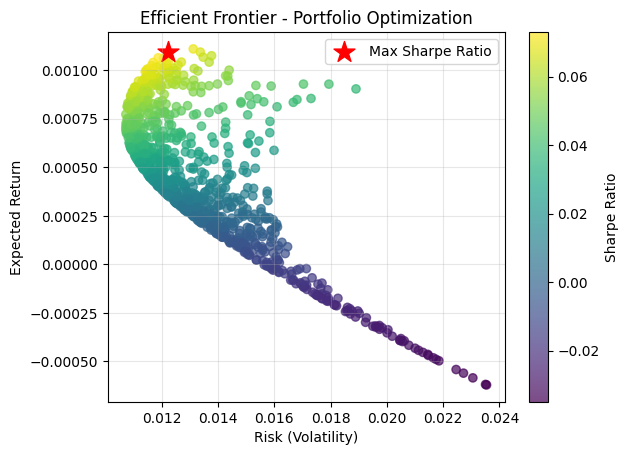

In [16]:
plt.scatter(
    portfolios["Volatility"],
    portfolios["Return"],
    c=portfolios["Sharpe"],
    cmap='viridis',
    alpha=0.7
)

plt.colorbar(label="Sharpe Ratio")
plt.xlabel("Risk (Volatility)")
plt.ylabel("Expected Return")
plt.title("Efficient Frontier - Portfolio Optimization")

plt.grid(alpha=0.3)

max_sharpe_idx = np.argmax(portfolio_sharpes)
plt.scatter(portfolio_volatilities[max_sharpe_idx],
            portfolio_returns[max_sharpe_idx],
            color='r', marker='*', s=250, label='Max Sharpe Ratio')
plt.legend()
plt.show()


